# Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading data

In [2]:
df = pd.read_csv('sms-spam.csv', encoding='latin1', usecols=[0, 1], names=['is spam', 'text'])[1:]
df['is spam'] = df['is spam'].apply(lambda x: 0 if x == 'ham' else 1)
df.head()

,is spam,text
1,0,"Go until jurong point, crazy.. Available only ..."
2,0,Ok lar... Joking wif u oni...
3,1,Free entry in 2 a wkly comp to win FA Cup fina...
4,0,U dun say so early hor... U c already then say...
5,0,"Nah I don't think he goes to usf, he lives aro..."


# Analysing data

In [3]:
df.groupby('is spam').describe()

text
is spam                                                          
0       count                                                4825
        unique                                               4516
        top                                Sorry, I'll call later
        freq                                                   30
1       count                                                 747
        unique                                                653
        top     Please call our customer service representativ...
        freq                                                    4

# Adding features

## Percentage digits

In [4]:
def percentage_digits(text):
    counter = 0
    for i in text:
        if i.isdigit():
            counter += 1
    return (counter / len(text)) * 100

df['percentage digits'] = df['text'].apply(percentage_digits)
df.head()

,is spam,text,percentage digits
1,0,"Go until jurong point, crazy.. Available only ...",0.000000
2,0,Ok lar... Joking wif u oni...,0.000000
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032
4,0,U dun say so early hor... U c already then say...,0.000000
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000


## Percentage question mark

In [5]:
def percentage_question_mark(text):
    counter = 0
    for i in text:
        if i == '?':
            counter += 1
    return (counter / len(text)) * 100

df['percentage question mark'] = df['text'].apply(percentage_question_mark)
df.head()

,is spam,text,percentage digits,percentage question mark
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0
4,0,U dun say so early hor... U c already then say...,0.000000,0.0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0


## Percentage exclamation mark

In [6]:
def percentage_exclamation_mark(text):
    counter = 0
    for i in text:
        if i == '!':
            counter += 1
    return (counter / len(text)) * 100

df['percentage exclamation mark'] = df['text'].apply(percentage_exclamation_mark)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0


## Percentage period

In [7]:
def percentage_period(text):
    counter = 0
    for i in text:
        if i == '.':
            counter += 1
    return (counter / len(text)) * 100

df['percentage period'] = df['text'].apply(percentage_period)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage period
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,7.207207
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,20.689655
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,0.645161
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,12.244898
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,0.000000


## Percentage caps

In [8]:
def percentage_caps(text):
    counter = 0
    for i in text:
        if i.isupper():
            counter += 1
    return (counter / len(text)) * 100

df['percentage caps'] = df['text'].apply(percentage_caps)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage period,percentage caps
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,7.207207,2.702703
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,20.689655,6.896552
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,0.645161,6.451613
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,12.244898,4.081633
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,0.000000,3.278689


## Contains emoji?

In [9]:
def contains_emoji(text):
    return int(':)' in text or ':(' in text or ':-)' in text or ':=D' in text or ':D' in text or ':P' in text)

df['contains emoji'] = df['text'].apply(contains_emoji)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage period,percentage caps,contains emoji
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,7.207207,2.702703,0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,20.689655,6.896552,0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,0.645161,6.451613,0
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,12.244898,4.081633,0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,0.000000,3.278689,0


## Length

In [10]:
df['length'] = df['text'].apply(len)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage period,percentage caps,contains emoji,length
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,7.207207,2.702703,0,111
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,20.689655,6.896552,0,29
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,0.645161,6.451613,0,155
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,12.244898,4.081633,0,49
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,0.000000,3.278689,0,61


## Creating Features from a Bag of Words

### Cleaning the text

In [11]:
from nltk.corpus import stopwords

def isalpha(word):
    wrod = word.replace('.', '')
    return word.isalpha()

def clean_sms(text):
    text = text.lower()
    return (' '.join(filter(lambda x: isalpha(x) and x not in stopwords.words("english"), text.split()))).replace('.', '').split()

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', min_df=5, analyzer=clean_sms)
df = pd.concat([df, pd.DataFrame(cv.fit_transform(df['text']).todense(), columns=cv.get_feature_names(), index=np.arange(1, cv.fit_transform(df['text']).todense().shape[0] + 1))], axis=1)
df.head(2)

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage period,percentage caps,contains emoji,length,abiola,...,yet,ym,yo,yoga,yr,yrs,yun,yup,zed,ìï
1,0,"Go until jurong point, crazy.. Available only ...",0.0,0.0,0.0,7.207207,2.702703,0,111,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Ok lar... Joking wif u oni...,0.0,0.0,0.0,20.689655,6.896552,0,29,0,...,0,0,0,0,0,0,0,0,0,0


# Analysing data again

In [12]:
df.groupby('is spam').mean()

,percentage digits,percentage question mark,percentage exclamation mark,percentage period,percentage caps,contains emoji,length,abiola,able,abt,...,yet,ym,yo,yoga,yr,yrs,yun,yup,zed,ìï
is spam,,,,,,,,,,,,,,,,,,,,,
0,0.420082,0.544954,0.233188,3.302500,5.952566,0.064456,71.023627,0.001865,0.005389,0.005181,...,0.004145,0.001036,0.004974,0.001036,0.000622,0.000622,0.001036,0.006425,0.000000,0.010777
1,11.579405,0.169521,0.524716,1.503612,11.061228,0.000000,138.866131,0.000000,0.000000,0.000000,...,0.001339,0.000000,0.001339,0.000000,0.014726,0.004016,0.000000,0.000000,0.006693,0.000000


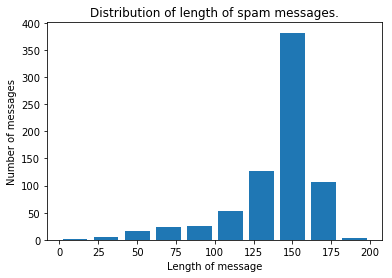

In [13]:
plt.hist(df[df['is spam'] == 1]['length'], bins=10, range=(0, 200), rwidth=0.8)
plt.xlabel('Length of message')
plt.ylabel('Number of messages')
plt.title('Distribution of length of spam messages.')
plt.show()


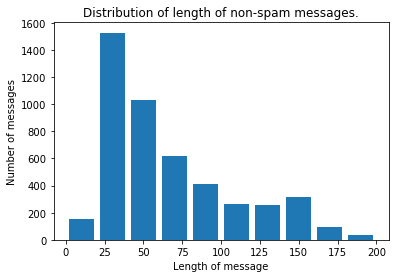

In [14]:
plt.hist(df[df['is spam'] == 0]['length'], bins=10, range=(0, 200), rwidth=0.8)
plt.xlabel('Length of message')
plt.ylabel('Number of messages')
plt.title('Distribution of length of non-spam messages.')
plt.show()

# Training model and calculating accuracy

In [15]:
X = df.drop(['is spam', 'text'], axis = 1)
y = df['is spam']

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (5572, 1289)
y.shape: (5572,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6)
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5)

print("Train dataset size: ", X_train.shape[0])
print("CV size: ", X_cv.shape[0])
print("Test size: ", X_test.shape[0])

Train dataset size:  3343
CV size:  1114
Test size:  1115


### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(y_cv, clf.predict(X_cv), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_cv, clf.predict(X_cv)))

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99       963
       spam       0.98      0.91      0.95       151

avg / total       0.99      0.99      0.99      1114

F1 score: 0.945205479452


### Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf = clf.fit(X_train, y_train)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(y_cv, clf.predict(X_cv), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_cv, clf.predict(X_cv)))

             precision    recall  f1-score   support

        ham       0.99      0.98      0.98       963
       spam       0.88      0.93      0.90       151

avg / total       0.97      0.97      0.97      1114

F1 score: 0.903225806452


### Choosing best algorithm on basis of cross validation set

In [21]:
y_actual = y_test
y_predicted = clf.predict(X_test)

In [22]:
true_positives = X_test[(y_actual == 1) & (y_predicted == 1)]
true_negatives = X_test[(y_actual == 0) & (y_predicted == 0)]
false_positives = X_test[(y_actual == 0) & (y_predicted == 1)]
false_negatives = X_test[(y_actual == 1) & (y_predicted == 0)]

In [23]:
precision = true_positives.shape[0] / (true_positives.shape[0] + false_positives.shape[0])
print("Precision:", precision)
recall = true_positives.shape[0] / (true_positives.shape[0] + false_negatives.shape[0])
print("Recall:", recall)
f1_score = 2 * precision * recall / (precision + recall)
print("F1 score:", f1_score)

Precision: 0.9050632911392406
Recall: 0.8881987577639752
F1 score: 0.8965517241379312
